# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [2]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0014600000000000006, E_test is 0.013789999999999978
Average number of iterations is 2241.4.


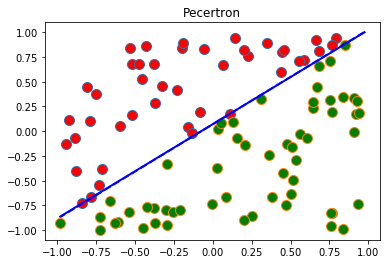

In [41]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000  # number of testing data
E_train = 0
E_test = 0
Total_iters = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    X = totalX[:, :nTrain]
    y = totaly[:, :nTrain]
    Xt = totalX[:, nTrain:]
    yt = totaly[:, nTrain:]
    w_g, iters = perceptron(X, y)
    # Sum up number of iterations
    Total_iters += iters
    
    # Compute training, testing error
    y_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.sum(y != y_hat)/nTrain
    yt_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, Xt.shape[1])), Xt))))
    E_test += np.sum(yt != yt_hat)/nTest

E_train /= nRep
E_test /= nRep
avgIter = Total_iters/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.16, E_test is 0.153
Average number of iterations is 10000.


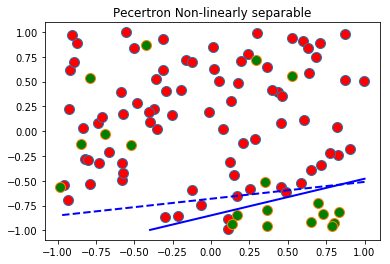

In [12]:
from perceptron import perceptron
nTrain = 100 # number of training data
nTest = 1000 # number of testing data
totalX, totaly, w_f = mkdata(nTrain + nTest, 'noisy')
X = totalX[:, :nTrain]
y = totaly[:, :nTrain]
Xt = totalX[:, nTrain:]
yt = totaly[:, nTrain:]
w_g, avgIter = perceptron(X, y)

y_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_train = np.sum(y != y_hat)/nTrain
yt_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, Xt.shape[1])), Xt))))
E_test = np.sum(yt != yt_hat)/nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.038880000000000074, E_test is 0.04675500000000002


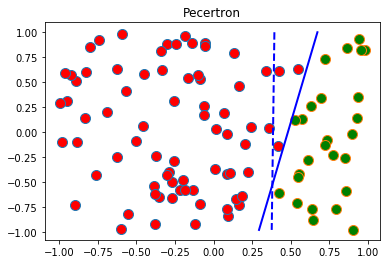

In [45]:
from linear_regression import linear_regression

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000  # number of testing data
E_train = 0
E_test = 0
Total_iters = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    X = totalX[:, :nTrain]
    y = totaly[:, :nTrain]
    Xt = totalX[:, nTrain:]
    yt = totaly[:, nTrain:]    
    w_g= linear_regression(X, y)
    # Compute training, testing error
    y_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.sum(y != y_hat)/nTrain
    yt_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, Xt.shape[1])), Xt))))
    E_test += np.sum(yt != yt_hat)/nTest

E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Pecertron')

## Part4: Linear Regression: noisy

E_train is 0.13135000000000005, E_test is 0.14321600000000004


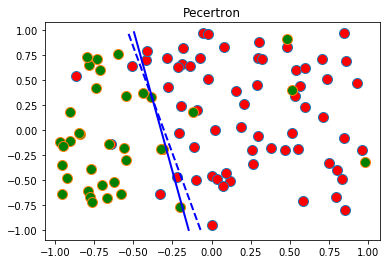

In [46]:
from linear_regression import linear_regression

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000  # number of testing data
E_train = 0
E_test = 0
Total_iters = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest, 'noisy')
    X = totalX[:, :nTrain]
    y = totaly[:, :nTrain]
    Xt = totalX[:, nTrain:]
    yt = totaly[:, nTrain:]    
    w_g= linear_regression(X, y)
    # Compute training, testing error
    y_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.sum(y != y_hat)/nTrain
    yt_hat = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, Xt.shape[1])), Xt))))
    E_test += np.sum(yt != yt_hat)/nTest

E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Pecertron')

## Part5: Linear Regression: poly_fit

In [54]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
y_hat = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_train = np.sum(y != y_hat)/y.shape[1]
y_test_hat = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
E_test = np.sum(y_test != y_test_hat)/y_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# # poly_fit with transform
X_t = np.zeros((X.shape[0]+3, X.shape[1]))
X_t[0:2] = X[0:2]
X_t[2] = X[0]*X[1]
X_t[3] = X[0]*X[0]
X_t[4] = X[1]*X[1]
X_test_t = np.zeros((X_test.shape[0]+3, X_test.shape[1]))
X_test_t[0:2] = X_test[0:2]
X_test_t[2] = X_test[0]*X_test[1]
X_test_t[3] = X_test[0]*X_test[0]
X_test_t[4] = X_test[1]*X_test[1]
w = linear_regression(X_t, y)
# Compute training, testing error
y_hat = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t))))
E_train = np.sum(y != y_hat)/y.shape[1]
y_test_hat = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))))
E_test = np.sum(y_test != y_test_hat)/y_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.002900000000000001, E_test is 0.010860000000000003


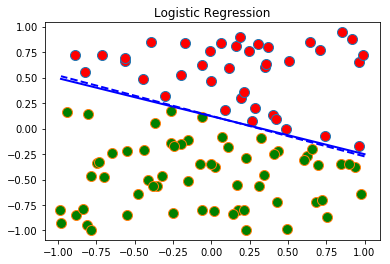

In [3]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 1000; # number of testing data
E_train = 0
E_test = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    # regularize y from {-1, 1} to {0, 1}
    for i in range(totaly.shape[1]):
        if(totaly[0][i] == -1):
            totaly[0][i] = 0
    X = totalX[:, :nTrain]
    y = totaly[:, :nTrain]
    Xt = totalX[:, nTrain:]
    yt = totaly[:, nTrain:]     
    w_g = logistic(X, y);
    # Compute training, testing error
    y_hat = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))))
    for i in range(y_hat.shape[1]):
        if(y_hat[0][i] > 0.5):
            y_hat[0][i] = 1
        else:
            y_hat[0][i] = 0
    E_train += np.sum(y != y_hat)/nTrain
    yt_hat = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1, Xt.shape[1])), Xt)))))
    for i in range(yt_hat.shape[1]):
        if(yt_hat[0][i] > 0.5):
            yt_hat[0][i] = 1
        else:
            yt_hat[0][i] = 0
    E_test += np.sum(yt != yt_hat)/nTest
    
E_train /= nRep
E_test /= nRep    
print('E_train is {}, E_test is {}'.format(E_train, E_test))
for i in range(y.shape[1]):
    if(y[0][i] == 0):
        y[0][i] = -1
plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.11849999999999998, E_test is 0.12809000000000004


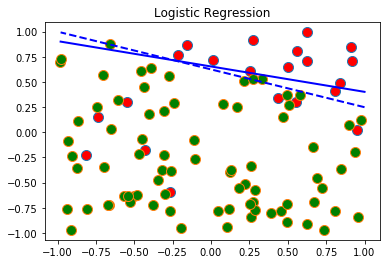

In [4]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 1000; # number of testing data
E_train = 0
E_test = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest, 'noisy')
    # regularize y from {-1, 1} to {0, 1}
    for i in range(totaly.shape[1]):
        if(totaly[0][i] == -1):
            totaly[0][i] = 0
    X = totalX[:, :nTrain]
    y = totaly[:, :nTrain]
    Xt = totalX[:, nTrain:]
    yt = totaly[:, nTrain:]     
    w_g = logistic(X, y);
    # Compute training, testing error
    y_hat = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))))
    for i in range(y_hat.shape[1]):
        if(y_hat[0][i] > 0.5):
            y_hat[0][i] = 1
        else:
            y_hat[0][i] = 0
    E_train += np.sum(y != y_hat)/nTrain
    yt_hat = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1, Xt.shape[1])), Xt)))))
    for i in range(yt_hat.shape[1]):
        if(yt_hat[0][i] > 0.5):
            yt_hat[0][i] = 1
        else:
            yt_hat[0][i] = 0
    E_test += np.sum(yt != yt_hat)/nTest
    
E_train /= nRep
E_test /= nRep    
print('E_train is {}, E_test is {}'.format(E_train, E_test))
for i in range(y.shape[1]):
    if(y[0][i] == 0):
        y[0][i] = -1
plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part8: SVM

E_train is 0.0, E_test is 0.03358299999999994
Average number of support vectors is 3.494.


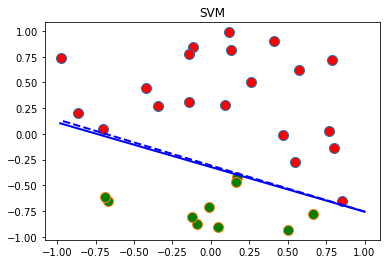

In [31]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 30; # number of training data
nTest = 1000; # number of testing data
E_train = 0
E_test = 0
avgNum = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    X = totalX[:, :nTrain]
    y = totaly[:, :nTrain]
    Xt = totalX[:, nTrain:]
    yt = totaly[:, nTrain:]  
    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    y_hat = np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))
    E_train += np.sum(y_hat*y < 0)/nTrain
    yt_hat = np.matmul(w_g.T, np.vstack((np.ones((1, Xt.shape[1])), Xt)))
    E_test += np.sum(yt_hat*yt < 0)/nTest
    # Sum up number of support vectors
    avgNum += num_sc

E_train /= nRep
E_test /= nRep
avgNum /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.